In [177]:
# import from utils notebook
# This has all the library imports we need
%run utils.ipynb

Let's start with some exploratory analysis of the DC Lau translation

In [7]:
with open('data/complete_translations.pkl', 'rb') as f:
    translations = pickle.load(f)

dclau = translations['DCLau_1963']

Let's get all the important words. We ignore all the words that are not nouns, verbs, or adjectives

In [8]:
joined = " ".join([" ".join(c) for c in dclau])
dclau_cleaned = clean_string(joined, pos={'NN', 'JJ', 'VB'})

dclau_cleaned[:10]

['way',
 'constant',
 'way',
 'name',
 'constant',
 'name',
 'nameless',
 'beginning',
 'heaven',
 'earth']

Let's plot all the words based on their frequencies

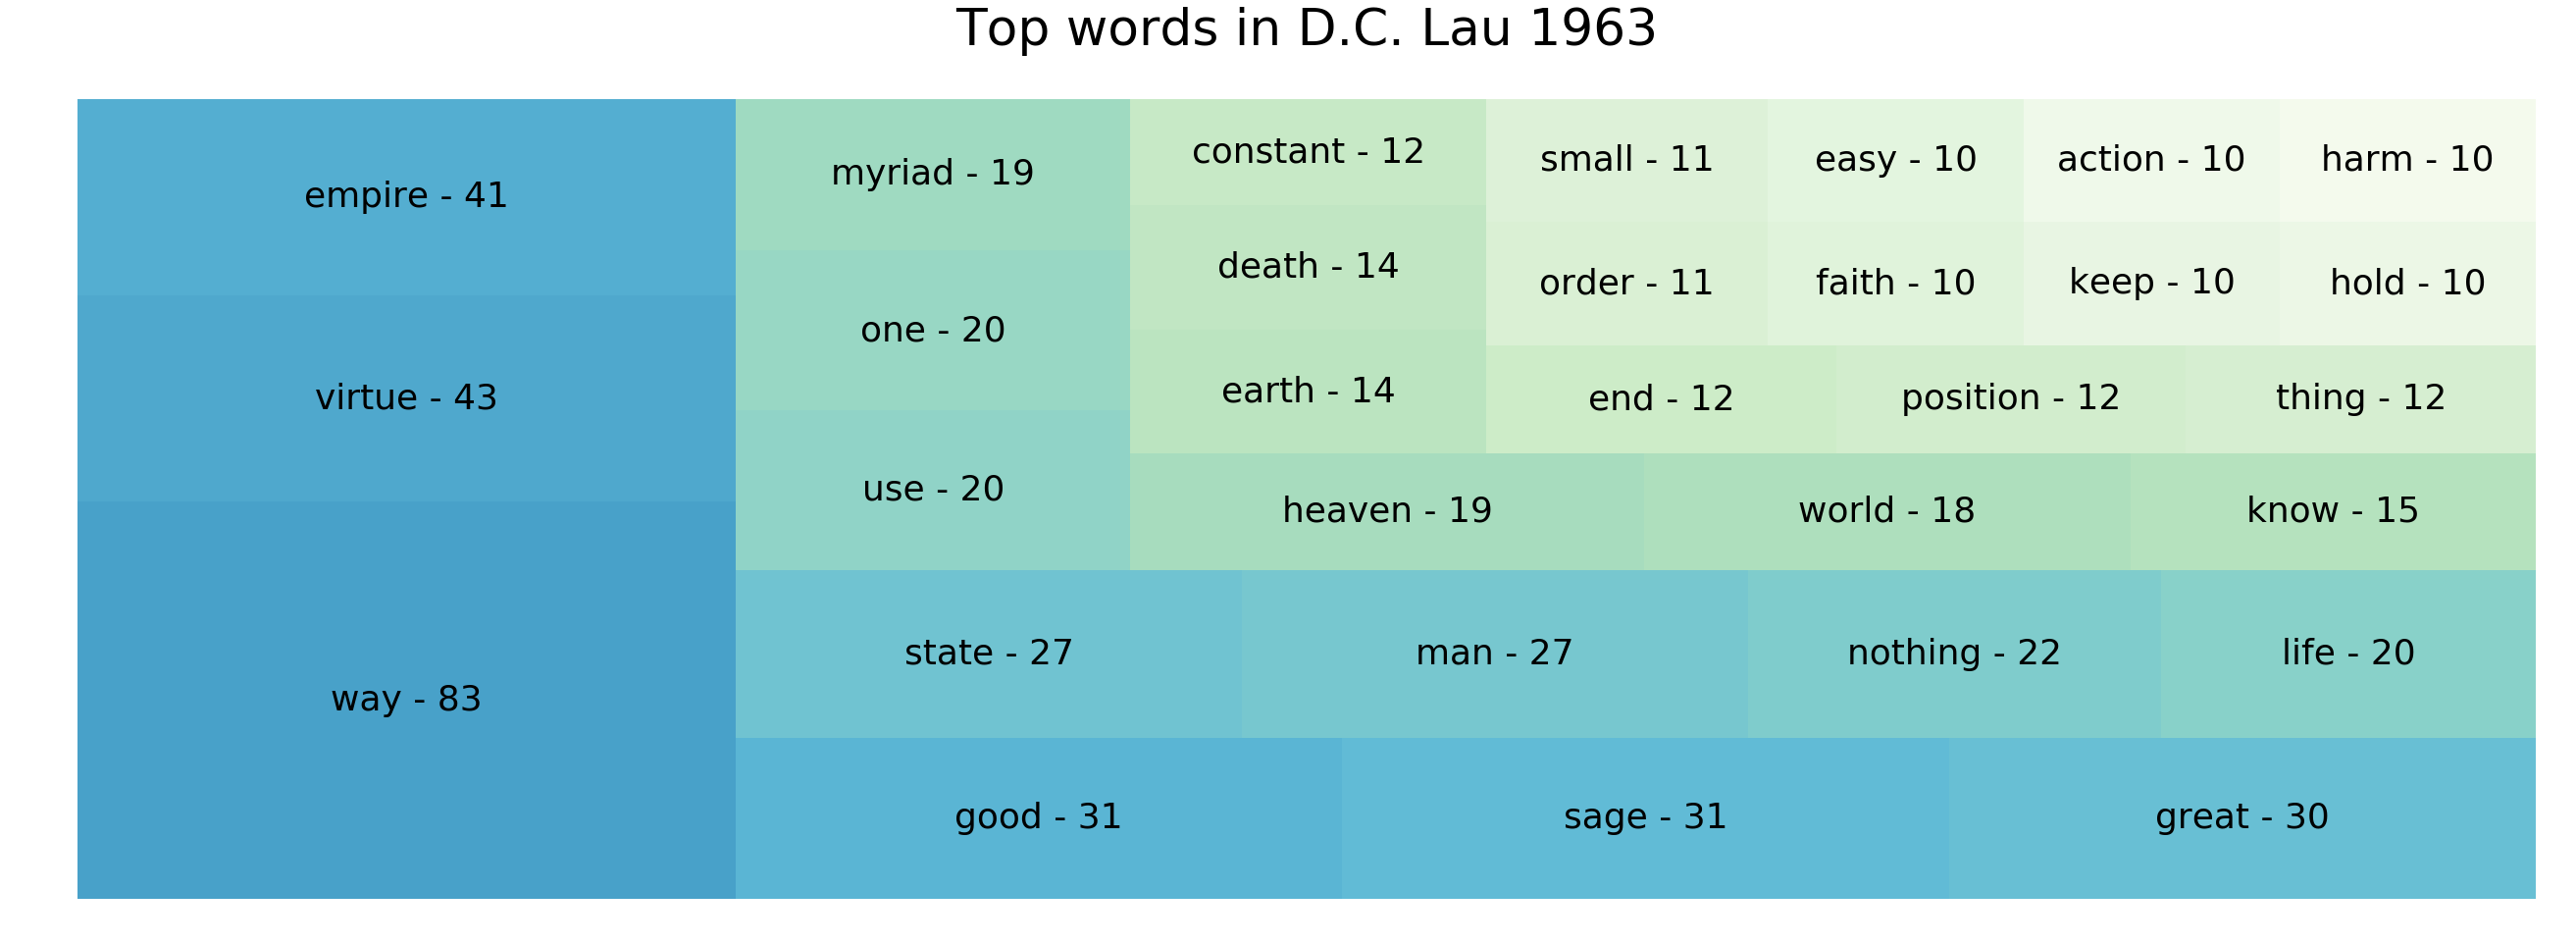

In [9]:
plot_squarify(dclau_cleaned, show=30)
plt.title("Top words in D.C. Lau 1963", y=1.06)
#plt.tight_layout()
plt.savefig("NN_JJ_VB_squarify_dclau.png", dpi=300)

As expected, the <i>Way</i> and <i>Virtue</i> are the most common words. After all, this is The Scripture of the Way and its Virtue. However, what is interesting is that "empire" comes in third place and state is not far behind. This supports the view that the DDJ is a book about statecraft which makes sense given that the book often addressed the ruling class and its Zhou dynasty context. 

Now let us carry on a similar analysis for the Mitchell translation. 

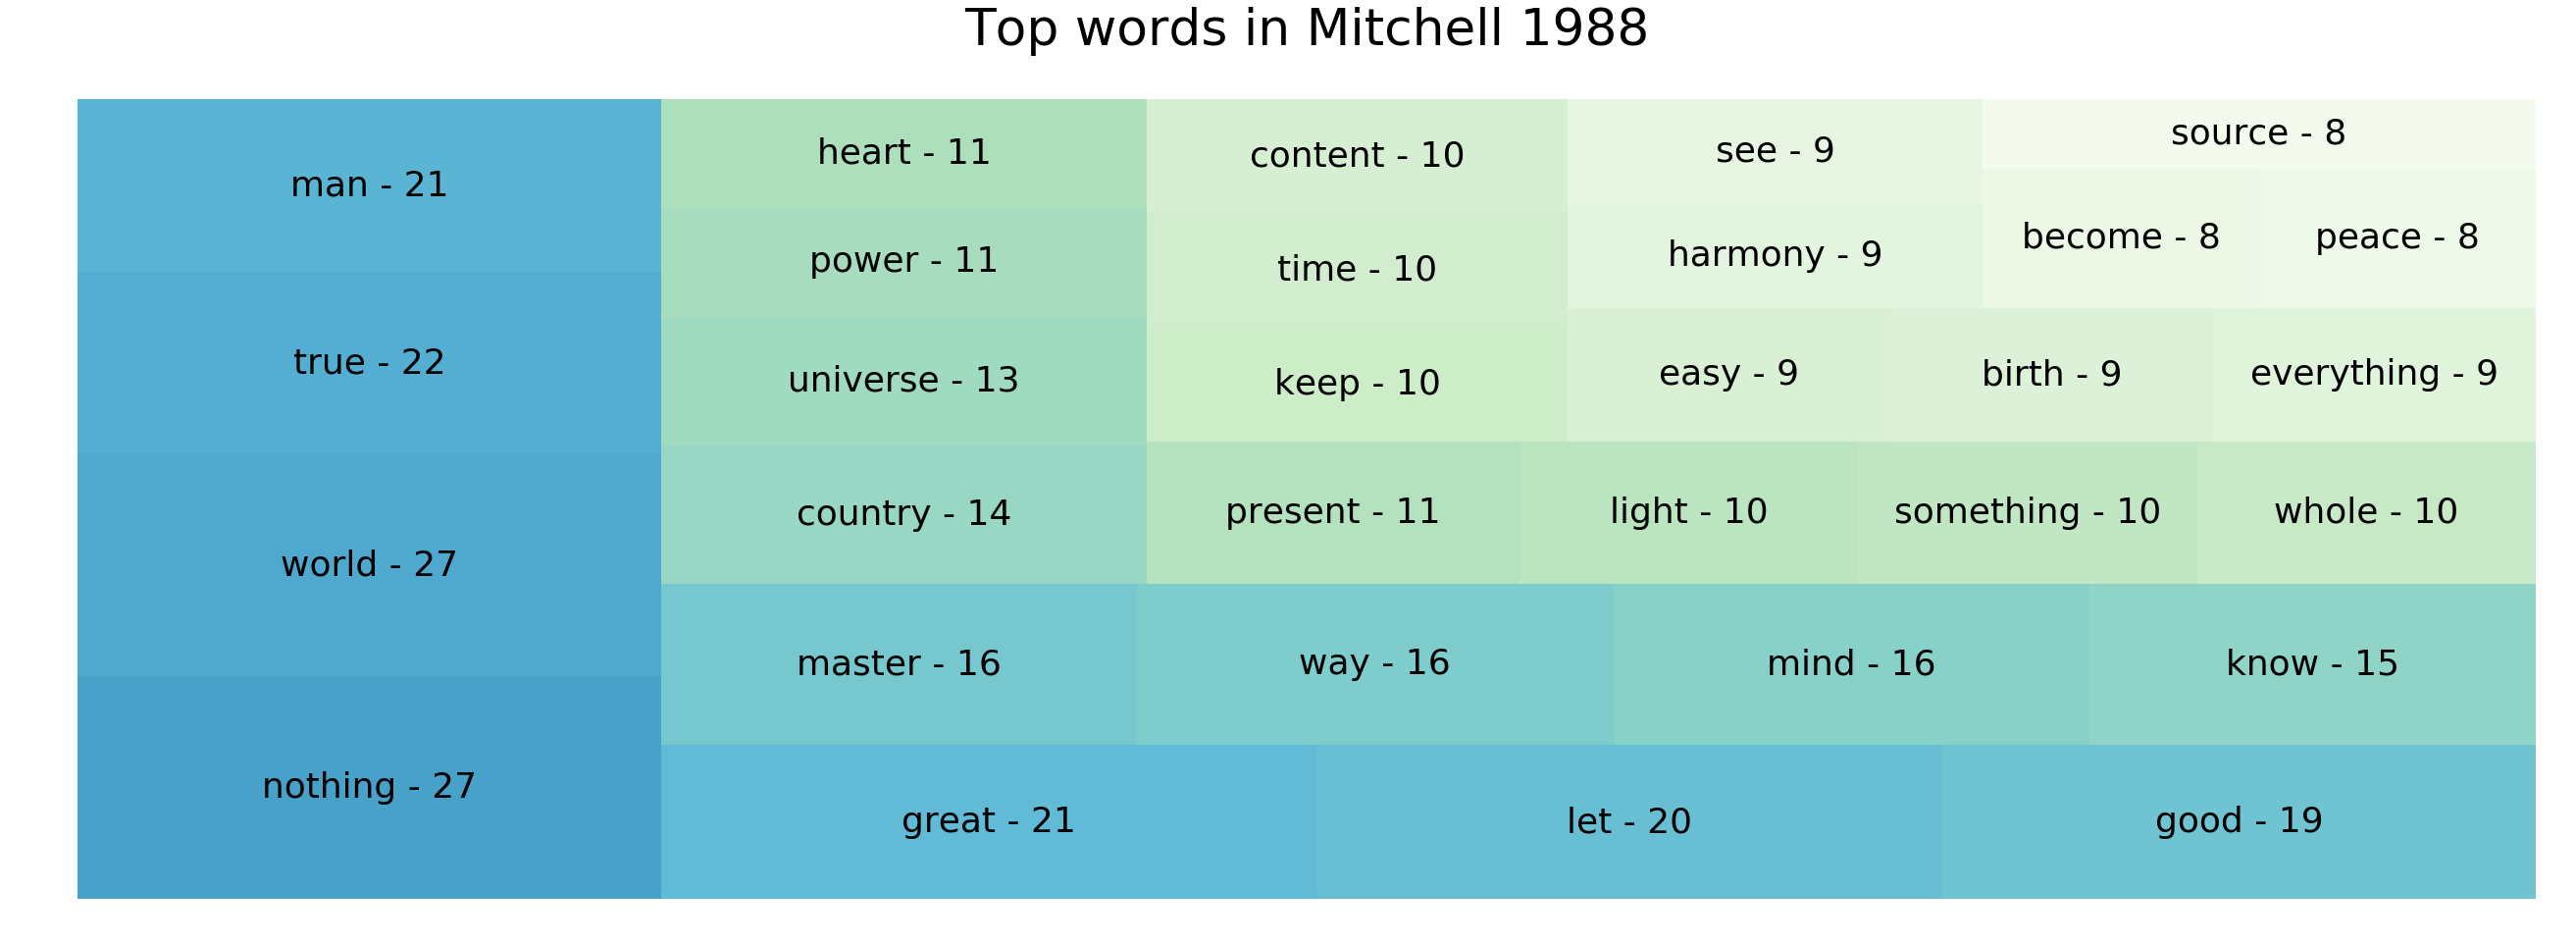

In [12]:
mitchell = translations['Mitchel_1988']
joined = " ".join([" ".join(c) for c in mitchell])
mitchell_cleaned = clean_string(joined, pos={'NN', 'JJ', 'VB'})

plot_squarify(mitchell_cleaned, show=30)
plt.title("Top words in Mitchell 1988", y=1.06)
plt.savefig("NN_JJ_VB_squarify_mitchell.png", dpi=300)

Surprisingly we don't see a specific synonym for the <i>Way</i> in the top 5 words. This is possibly because Mitchell uses both the words <i>Tao</i> and <i>Way</i> to refer to what D.C. Lau always calls the Way <i>Way</i> . 

We are already starting to see differences between how different people interpreted the text. Next we try to compare the words more directly by plotting the frequencies against each other. 

In [23]:
mitchell_words, mitchell_freqs = count(mitchell_cleaned)
dclau_word, dclau_freqs = count(dclau_cleaned)

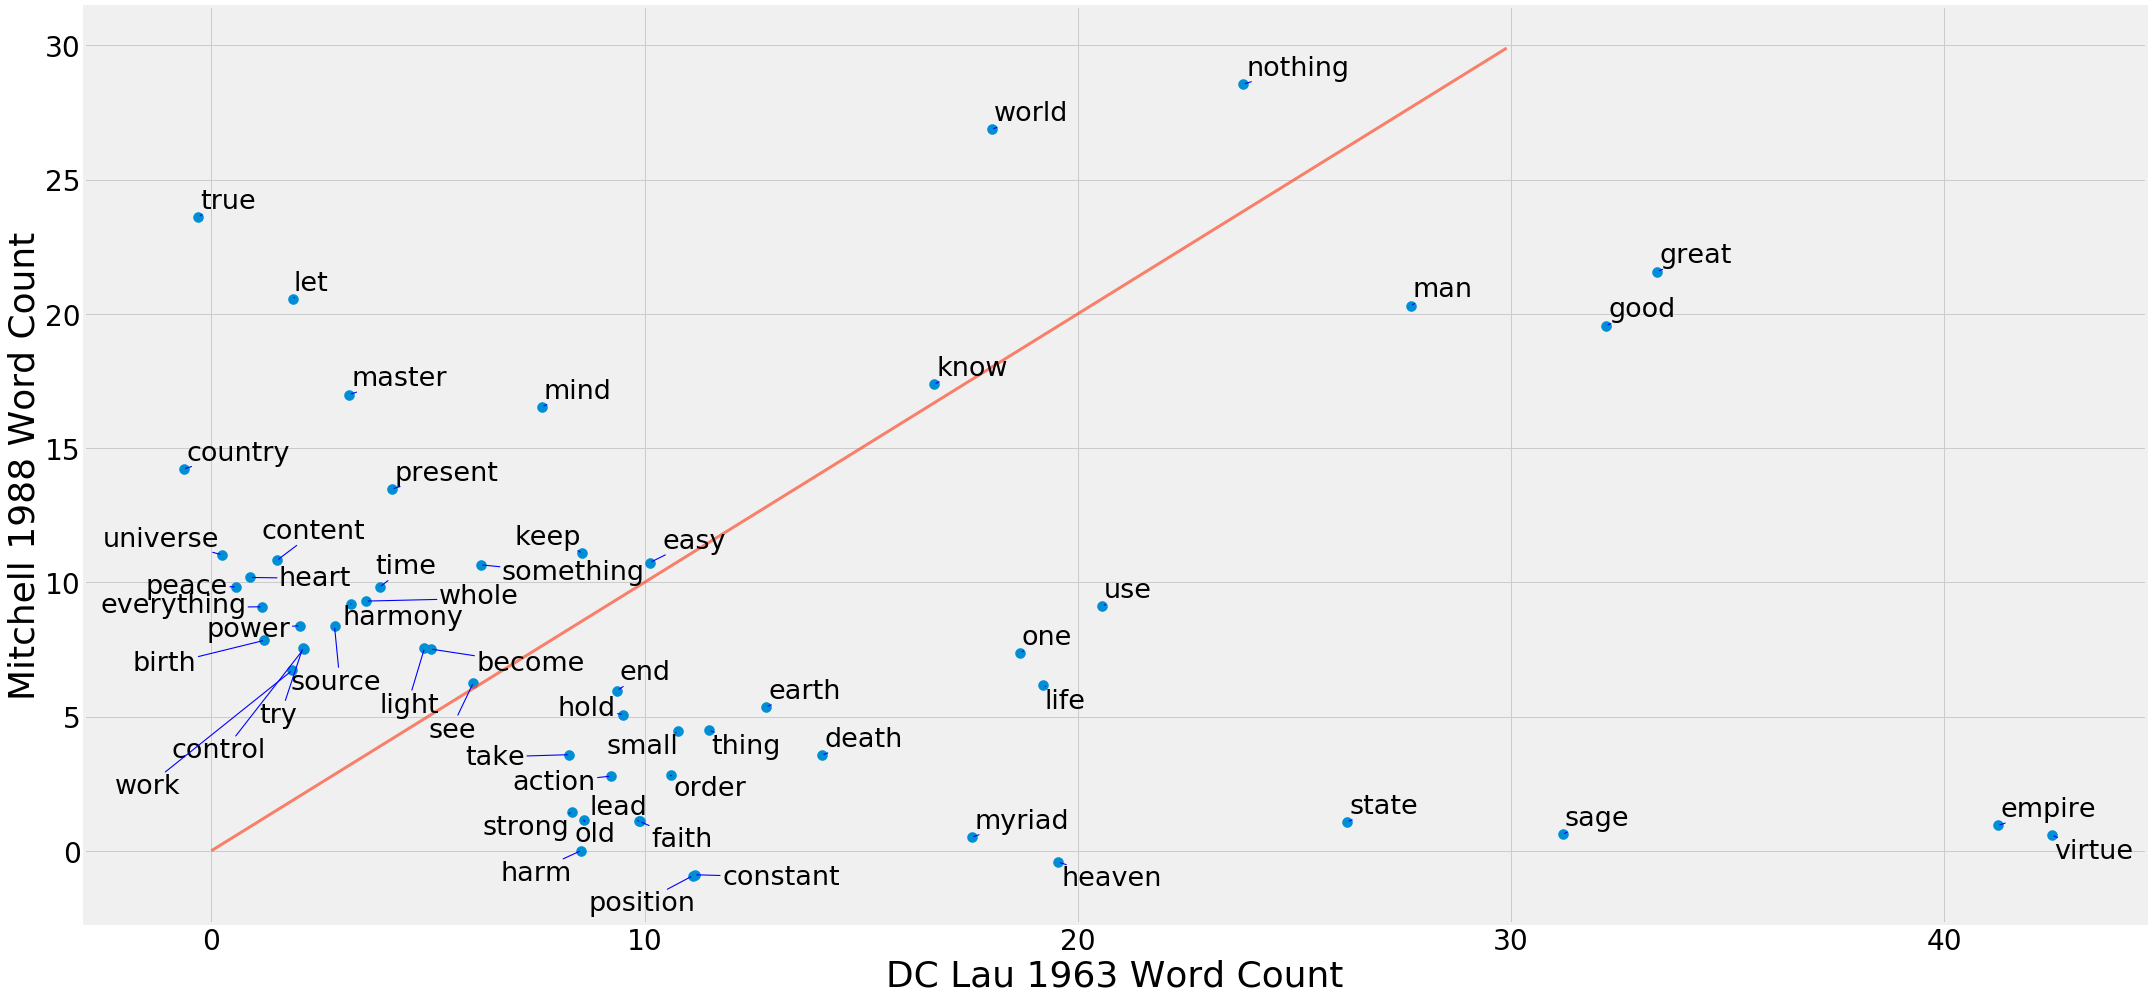

In [180]:
compare_freqs(dclau_cleaned, mitchell_cleaned, n=35)
plt.xlabel('DC Lau 1963 Word Count', fontsize=36)
plt.ylabel('Mitchell 1988 Word Count', fontsize=36)
plt.tight_layout()
plt.savefig('dclau_mitchell_freq_comparison.png', dpi=300)

Here we see that some words are use by DC Lau very frequently but are rarely use by Mitchell and vice versa. For example, DC Lau uses the word empire a lot while Mitchell prefers to use the word country instead. It could be that the Chinese word they are refering too is ambiguous (similar to most of the DDJ). 

We also notice some words lie close to the red line suggesting that these words have standard translations since they are used equally frequently by both authors. 

--------------

We could carry out a similar analysis for other pairs of translations. However, with over 170 translations in our dataset, this makes $1{70 \choose 2} \sim 14000 $ pairs, how do we know which ones to compare? It is highly likely that there is a smaller set of interpretations that guide these interpretations. Maybe some focus on self-cultivation, while other focus on statecraft. Now we attempt to find these grouping using clustering. 

We get the 170 translations of chapter 1 we scraped and embed them using GloVe word vectors. Then we cluster these representaions to group the translations. 

In [289]:
with open('data/chapter1_translations.pkl', 'rb') as f:
    translations = pickle.load(f)

# glove = load_embeddings('../../CSAIL_SLS/wiki_embeddings/word_embs/glove/glove.6B.50d.txt')
glove = load_embeddings('../../CSAIL_SLS/wiki_embeddings/word_embs/glove/glove.840B.300d.txt')

Loading Glove Model


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))


Done. 400000  words loaded!


In [192]:
translations['A.C. Graham']

'The Way that can be \x93Way\x94-ed Is not the constant Way. The name that can be named Is not the constant name. What has no name is the beginning of heaven and earth, What has a name is the mother of the myriad things. Therefore by constantly having no desire observe the sublimest in it, By constantly having desire observe where it tends. The two have the same source but different names: Call it the same, the \x93Dark.\x94 The darkest of the dark Is the gate of the sublime in everything.'

In [234]:
translation_embs = {}
for author, translation in translations.items():
    translation_embs[author] = embed_string(translation, glove)

In [235]:
translation_embs['A.C. Graham']

array([ 6.47903870e-02,  1.23156181e-01, -1.59565925e-01, -1.07254130e-01,
        1.10213370e-01,  1.45973920e-02,  2.40498810e-02, -1.28349030e-02,
       -4.36045900e-02,  2.29706220e+00, -1.48653077e-01,  3.73058688e-02,
        5.54037070e-02, -4.26659570e-02, -5.06006800e-02, -1.05032522e-01,
       -7.09692300e-02,  1.12579266e+00, -1.55220500e-01, -5.30099400e-02,
       -3.35399340e-02, -9.18720800e-02, -1.00989143e-01,  1.23917290e-02,
        2.85357980e-02,  2.20628070e-02, -3.62819130e-02, -6.39411752e-02,
       -6.37682854e-02,  2.04835360e-02, -1.32305426e-02,  1.50563383e-01,
       -9.06705570e-02,  1.11719531e-01,  1.00056682e-01, -1.01657570e-02,
        1.10443106e-02,  3.30409830e-02, -4.15792675e-02, -9.43735600e-02,
        8.42765300e-03,  8.91291200e-02,  2.89369450e-02, -5.62684240e-02,
        4.43977790e-02, -6.02399940e-02, -1.54429710e-01, -4.07981272e-02,
       -2.93381300e-02,  3.31762991e-02, -3.41708000e-04,  7.94608100e-02,
       -1.02300370e-01,  

We are going to specify 4 different groupings

In [246]:
from sklearn.cluster import k_means

authors, embs = zip(*translation_embs.items())
centroids, labels, _ = k_means(embs, n_clusters=4)

In [247]:
labels

array([2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 2, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0,
       2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0,
       1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0,
       1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0])

In [248]:
for i, c in enumerate(centroids):
    dists = [np.linalg.norm(c - emb) for emb in embs]
    print(i, authors[np.argmin(dists)])

0 Henry Wei
1 Lok Sang Ho
2 D. Howard Smith
3 Timothy Leary


In [239]:
translations['Lok Sang Ho']

'Ways that can be spelled out cannot be the eternal way. Names that can be named must change with time and place. Emptiness is the origin of heaven and earth; Existence is the mother of everything that had a birth. Appreciate Emptiness, that we may see the nature of the Dao\x92s versatility; Appreciate Existence, that we may see the extent of the Dao’s possibilities. These two, Emptiness and Existence, came from the same source. Though they bear different names, they serve the same mystical cause. A mystery within a mystery, such is the gateway to all versatility.'

In [241]:
translations['Henry Wei']

'The Tao that can be stated is not the Eternal Tao. The name that can be named is not the Eternal Name. The Unnameable is originator of Heaven and Earth. The Nameable is mother of the ten thousand things. Therefore, Always be desireless, so as to discern Tao\x92s wonderful essence; Always have some desire, so as to discern its manifestations. These two come from the same source, But are different in name. Their identical nature is a mystery Mystery of mysteries That is the gate of all the wonderful essence.'

In [242]:
translations['Timothy Leary']

'That Which Is Called The Tao Is Not The Tao The flow of energy . . . . . Here . . . . . It . . . . . Is . . . . . Nameless . . . . . Timeless . . . . . Speed of Light . . . . . Float . . . . . beyond fear . . . . . Float . . . . . beyond desire . . . . . Into . . . . . this Mystery of Mysteries through this Gate . . . . . of All Wonder'

In [243]:
translations['D. Howard Smith']

'That which can be thought of as Tao (lit. Tao that can be tao\x92d) is not the  absolute Tao. Whatever name that can be applied is not its absolute name.  Nameless, it is the source of heaven and earth. Named, it is the mother of all  things. Therefore, considered as absolute \x93non-being\x94 we desire to see into  its mystery; as absolute \x93being\x94 we desire to observe its limitations. These  two (non-being and being), though identical in origin, emerge under different  names. Their common identity is called mysterious, mystery of mysteries, the  gate of all mystery.'

We see our clustering algorithm found 5 what it believes to be representations translations. And as we can see these translations are different not just in word usage but also in style and interpretation. These could act as our starting point for translations to compare. 

Let's look more closely at the identified clusters.

In [250]:
for j in range(5):
    for i, label in enumerate(labels):
        if label == j:
            print(authors[i], ':\t', translations[authors[i]])
            print('-'*15)
    print('*' * 25)
    print('*' * 25)
    print('*' * 25)
    print('*' * 25)

I.W. Heysinger :	 The way that can be overtrod is not the Eternal Way, The name that can be named is not the Everlasting Name Which Nameless brought forth Heaven and Earth, which Named, if name we may, The Mother of all the myriad things of time and space became. Thereby we sound eternally the mystery divine, But only without desire to sound, for if desire abide The portals of the issuing host our baffled sight confine, And deep within the eternal veil the mystery shall hide. These two, the Nameless and the Named, they differ but in name, For in their vast progression from the deep they are the same, The deep of deeps, from whose eternal gate all spirit came.
---------------
Lionel Giles :	 The Tao which can be expressed in words is not the eternal Tao; the name which  can be uttered is not its eternal name. Without a name, it is the Beginning of  Heaven and Earth; with a name, it is the Mother of all things. Only one who is  eternally free from earthly passions can apprehend its spiri

Hermon Ould :	 The Tao that can be expressed is not the    Unchanging Tao; The name that can be named is not the Unchanging name. The Unnameable is that from which Heaven and Earth derived, leaving itself    unchanged. Thinking of it as having a name, let it be called the Mother of all things. He who is without earthly passions and without desire can perceive the    profound mystery of that Unmanifested   Existence. He who has not rid himself of desire can perceive only the Manifest, with its    differentiations. Nevertheless, the Manifest and the Unmanifest are in origin the same. This sameness is the Mystery of Mysteries, the deep within the deep, the    Doorway into all Mystery.
---------------
Frederick B. Thomas :	 The Tao that can be named Is not the Absolute Tao; The quality that can be named, Is not its abiding attribute. The nameless is the origin of Heaven and Earth. The Named is the mother of all things. Truly, only he who frees himself from desire Can ever see the secret Es

Tolbert McCarroll :	 The Tao that can be spoken of is not the eternal Tao. The name that can be named is not the eternal name. The nameless is the beginning of heaven and earth. The named is the mother of the ten thousand things. Send your desires away and you will see the mystery. Be filled with desire and you will see only the manifestation. As these two come forth they differ in name. Yet at their source they are the same. This source is called a mystery. Darkness within darkness, the gateway to all mystery.
---------------
Raghavan Iyer :	 The Tao that can be told is not the eternal Tao; The name that can be named is not the eternal Name. The Nameless is the source of Heaven and Earth; The named is the Mother of the Ten Thousand Things. Desireless, one may behold the mystery. Desiring, one may see the manifestations. Though one in origin, They emerge with distinct names. Both are mysterious  Depth within depth  The threshold of all secrets.
---------------
R.L. Wing :	 The Tao th

Ray Grigg :	 The Tao that can be named is not the nameless Tao. The Tao that can be known is not the unknowable Tao. Nameless and unknowable, the Tao has been from the very beginning. It is the wisdom of all that is, and the way of the Great Mother. With desire, the Tao is hidden. Without desire, the Tao is apparent. The Tao and the Great Mother arose from the same dark source Their names are different, but they are inseparable. Together they are an endless wonder, And the boundless mystery of everythings oneness.
---------------
John R. Mabry :	 The Tao that can be described in words is not the true Tao The Name that can be named is not the true Name. From non-existence were called Heaven and Earth From existence all things were born In being without desires, you experience the wonder But by having desires, you experience the journey. Yet both spring from the same source and differ mostly in name. This source is called Mystery Mystery upon Mystery The womb giving birth to all of be

Robert Stevenson :	 The way of ways is not the true Way. The name of names is not the true Name. The Nameless is the beginning of Heaven and Earth. That with name is the mother of all creation. Thus, with true Nothingness one may view the mystery, And with true Being one may perceive the barrier. These two are of the same origin, yet their names differ. These two are called Profound. Beyond the Profound lies the gateway to the Universal Mystery.
---------------
Jeff Rasmussen :	 Spoken Tao is not eternal Tao Spoken name is not eternal name Nameless is the source of all Named is the source of the myriad things Ever desireless one sees wonders Ever desiring one sees manifestations These two are the same in origin yet differ in name The origin is the great mystery Gateway to all understanding.
---------------
Tien Cong Tran :	 The way that can be talked about is not the eternal Way. The name that can be named is not the eternal name. Nothing is the name of the origin of heaven and earth

---------------
Tony Barnstone and Chou Ping :	 The Dao that  can be told is not the timeless Dao. The name that can be named is not the eternal name. Heaven and earth emerged from the nameless. The named is the mother of all things. Lose desire to see the Daos essence. Have desire to see the Daos manifestations. These two have the same source but different names. Their sameness is a mystery, mystery of mysteries, gateway of untold secrets.
---------------
Hu Xuezhi :	 The Tao that can be spoken of is not the eternal    Tao. The name that can be named is not the eternal name. The nameless is the origin of Heaven and Earth. The named is the root of all things. Therefore, by being free from passion and desire, the subtleties of Tao can be experienced. The things existing in the world of duality can be well known by possessing passions and desires. The two above mentioned have the same source but are given different names. The ability of transformation between the two is a most mysterio

G.G. Alexander :	 God (the great everlasting infinite First Cause from whom all things in heaven  and earth proceed) can neither be defined nor named. For the God which can be defined or named is but the Creator, the Great Mother  of all those things of which our senses have cognisance. Now he who would gain a knowledge of the nature and attributes of the nameless  and undefinable God, must first set himself free from all earthly desires, for  unless he can do this, he will be unable to penetrate the material veil which  interposes between him and those spiritual conditions into which he would obtain  an insight. Yet the spiritual and the material, though known to us under different names,  are similar in origin, and issue from the same source, and the same obscurity  belongs to both, for deep indeed is the darkness which enshrouds the portals  through which we have to pass, in order to gain a knowledge of these mysteries.
---------------
P.J. Maclagan :	 A Tao that can be tao-ed is no

D.C. Lau :	 The way can be spoken of, But it would not be the constant way; The name can be named, But it would not be the constant name. The nameless was the beginning of the myriad creatures; The named was the mother of the myriad creatures. Hence constantly rid yourself of desires in order to observe its subtlety; But constantly allow yourself to have desires in order to observe what is    after. These two have the same origin but differ in name. They are both called dark, Darkness upon darkness The gateway to all that is subtle.
---------------
Wing-Tsit Chan :	 The Tao that can be told of is not the eternal Tao; The name that can be named is not the eternal name. The Nameless is the origin of Heaven and Earth; The Named is the mother of all things. Therefore let there always be non-being, so we may see their subtlety, And let there always be being, so we may see their outcome. The two are the same, But after they are produced, they have different names. They both may be called dee

Eva Wong :	 The Tao that can be spoken of is not the real way. That which can be named is only transient. The nameless was there before the sky and the earth were born. The named is the mother of the ten thousand things. In nothingness you will see its wonders; In things you will see its boundaries. These two come from the same origin, although they have different names. They emerged from somewhere deep and mysterious. This deep and mysterious place Is the gateway to all wonders.
---------------
Stephen F. Kaufmann :	 The true way is unknown and so is the untrue way There are no names to understand it Creation does not care that it is the source of creation It emanates as some thing And is not without nourishment Mysteries are revealed Become Its way Attain Its perfection Do not use words to describe its no-thing-ness The three are the same but distinct One is the Body One is the Heart One is the Mind To understand it as one is the most you can do It is the path to higher and lesser 

Roderic Sorrell and Amy Max Sorrell :	 The Tao can be explained,  but this is not the real Tao. Names can be given, but these are only a designation. The origin of Heaven and Earth is called Emptiness. The mother of all things is called Existence. When we focus on Emptiness, we become aware of the wonder of it all. When we focus on Existence, we become aware of the nature of all things. These both emerge together, but have different names. Both are called a Mystery. Mystery within Mystery. The doorway to all wonders.
---------------
Bram den Hond :	 As for the road, The Road that can be told is not the eternal Road. As for names, The name that can be named is not the eternal name. The nameless is the beginning of the ten thousand things. The named is the mother of the ten thousand things. Therefore, ever desireless, one can see the  mystery. Those constantly with desires, will only see what they yearn for and seek. These two spring from the same source. They have different names; yet t

---------------
Andre Gauthier :	 The spirit one can talk about is not the eternal spirit, and what you can name  is not the eternal name. Nameless-Tao is the beginning of the heavens and the  Earth. If you name it  it is no more than Matter. Therefore: he who conceives of nature freely grasps this Spirit  and he who strives for material things is left with only the shell. Spirit and  matter are both one in their origin, yet different in appearance. This unity is  a mystery  truly the mystery of all mysteries, the  gate to all spirituality.
---------------
Sonja Elen Kisa :	 The Flow of the universe is not one you can explain, And its true name is not one you can speak. For the universe began without words, And then we gave names to all things. In the world of non-being, we embrace its mysteries, And in the world of being, we interact with it. These two flow into one another And are separated only by name. Together they form a mystery. Enigma in enigma — Gateway to all wonders.
-----

Ellen M. Chen :	 Tao that can be spoken of, Is not the Everlasting Tao. Name that can be named, Is not the everlasting name. Nameless, the origin of heaven and earth; Named, the mother of ten thousand things. [ Alternative: Non-being, to name the origin of heaven and earth; Being, to name the mother of ten thousand things.] Therefore, always without desire, In order to observe the hidden mystery; Always with desire, In order to observe the manifestations. [ Alternative: Therefore, by the Everlasting Non-Being, We desire to observe its hidden mystery; By the Everlasting Being, We desire to observe the manifestations.] These two issue from the same origin, Though named differently. Both are called the dark. Dark and even darker, The door to all hidden mysteries.
---------------
John Louis Albert  Trottier :	 TAO (THE LAWS OF THE UNIVERSE) can be talked about, but not the Eternal Tao (Laws of the Universe). Names can be named, but not the Eternal Name. (You cannot name the unknown.) As th

dragonfly :	 the Profound Mystery of the Infinite Eternal Tao can never be elucidated even using the name Tao is attempting to name That which inherently cannot be named the Unfathomable conceives the illusion of separation/duality  space/time,  within/without, seeking/finding clothed with form and name, the Primal Creative Feminine constantly generates the myriad things sincerely seeking within the brightest light, one is entirely immersed in  duality and illusion searching deeply inside for Truth continually perpetuates the delusion of  separation there is no within/inside, nowhere to go, nothing to find, see, hear,  believe or do with no effort one may Realize simple Truth, one may BE All-ONE Reality illusion/Reality are different names, appearing to be separate things but there is no separation and no things  All is simply ONE this Singularity is absolute perfect sublime Darkness the entrance to the incomprehensible  Source
---------------
Tienzen Gong :	 Tao that can be spoke of

---------------------

We also have a collection of 11 complete translations. Wouldn't be cool if you could identify which chapters have standard translations and which ones are controversial varying significatly between authors?

This is what we attempt to do next. We load our complete translations and find the chapters with the smallest variance and the ones with the largest variance. 

In [276]:
with open('data/complete_translations.pkl', 'rb') as f:
    translations = pickle.load(f)

authors = translations.keys()

for author in authors:
    joined = [" ".join(c) for c in translations[author]]
    translations[author] = joined 

In [277]:
translation_embs = {}
for author in authors:
    embs = [embed_string(c, glove) for c in translations[author]]
    translation_embs[author] = embs

In [284]:
variances = []
for chapter in range(81):
    chapter_embs = []
    for author in authors:
        chapter_embs.append(translation_embs[author][chapter])
    
    X = np.vstack(chapter_embs)
    var = np.trace(X.T @ X)
    variances.append(var)
    
print(np.argmax(variances), np.argmin(variances))

32 17


In [287]:
for author in authors:
    print(author, ':\t', translations[author][32])
    print('-' * 15)
    print('-' * 15)

Feng_1972 :	 Knowing others is wisdom; Knowing the self is enlightenment. Mastering others requires force; Mastering the self needs strength. He who knows he has enough is rich. Perseverance is a sign of willpower. He who stays where he is endures. To die but not to perish is to be eternally present.
---------------
---------------
Mitchel_1988 :	 Knowing others is intelligence; knowing yourself is true wisdom. Mastering others is strength; mastering yourself is true power. If you realize that you have enough, you are truly rich. If you stay in the center and embrace death with your whole heart, you will endure forever.
---------------
---------------
Hair_1990 :	 Understanding others is knowledge, Understanding oneself is enlightenment; Conquering others is power, Conquering oneself is strength; Contentment is wealth, Forceful conduct is willfulness; Not losing one’s rightful place is to endure, To die but not be forgotten is longevity.
---------------
---------------
Addis&Lombardo_1

In [288]:
for author in authors:
    print(author, ':\t', translations[author][17])
    print('-' * 15)
    print('-' * 15)

Feng_1972 :	 When the great Tao is forgotten, Kindness and morality arise. When wisdom and intelligence are born, The great pretense begins. When there is no peace within the family, Filial piety and devotion arise. When the country is confused and in chaos, Loyal ministers appear.
---------------
---------------
Mitchel_1988 :	 When the great Tao is forgotten, goodness and piety appear. When the body’s intelligence declines, cleverness and knowledge step forth. When there is no peace in the family, filial piety begins. When the country falls into chaos, patriotism is born.
---------------
---------------
Hair_1990 :	 Therefore, When the great Way was forsaken, there was humaneness and righteousness; When cunning and wit appeared, there was great falsity; When the six family relationships lacked harmony, there were filial piety and parental kindness; When the state and royal house were in disarray, there were upright ministers.
---------------
---------------
Addis&Lombardo_1993 :	 Gre

Our algorithm was succesful at identifying similar translations that both use similar words and conveyed similar meaning. However, we were not as succesful as finding the controversial translations. This might be because we are using a small sample of translations or because it is difficult to measure variance across high-dimensional vectors. 

This is still a work in progress. More analysis should come soon...